## ¿El promedio globa depende de la región de los estudiantes?

En esta sección se busca entender el por qué detras de los resultados tan desiguales en los resultados globales de la prueba ICFES y una de las razones que surgen a la mente es si el departamento donde el estudiante estudia influye. 

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv('https://www.datos.gov.co/resource/kgxf-xxbe.csv')
# df = pd.read_csv('/Users/Daniel\Desktop/programación/IntrodIngSistemasAnalíticaDeDatos/Resultados__nicos_Saber_11_20250316.csv')


## Gráfica con el API de datos.gov.co

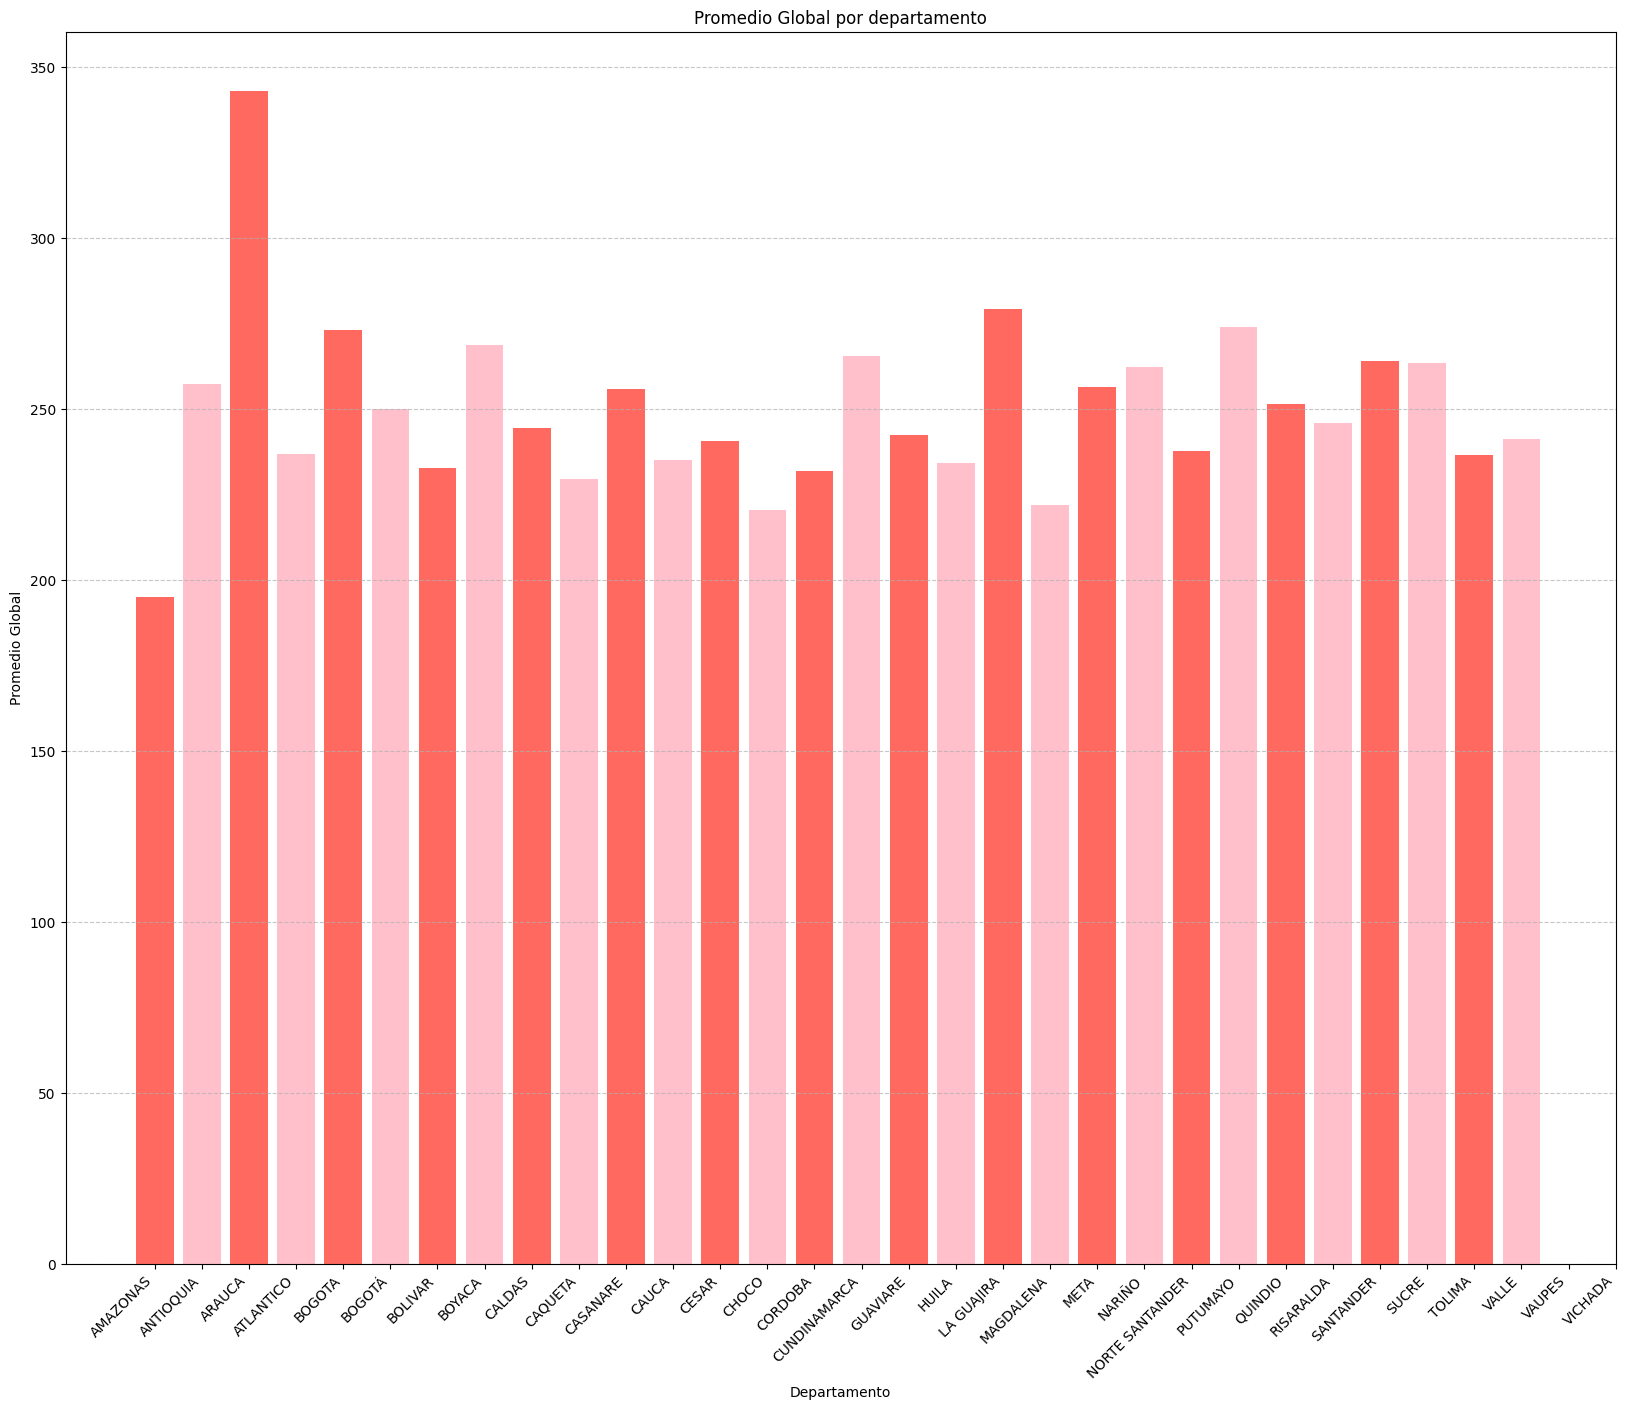

## Gráfica con la base de datos completa


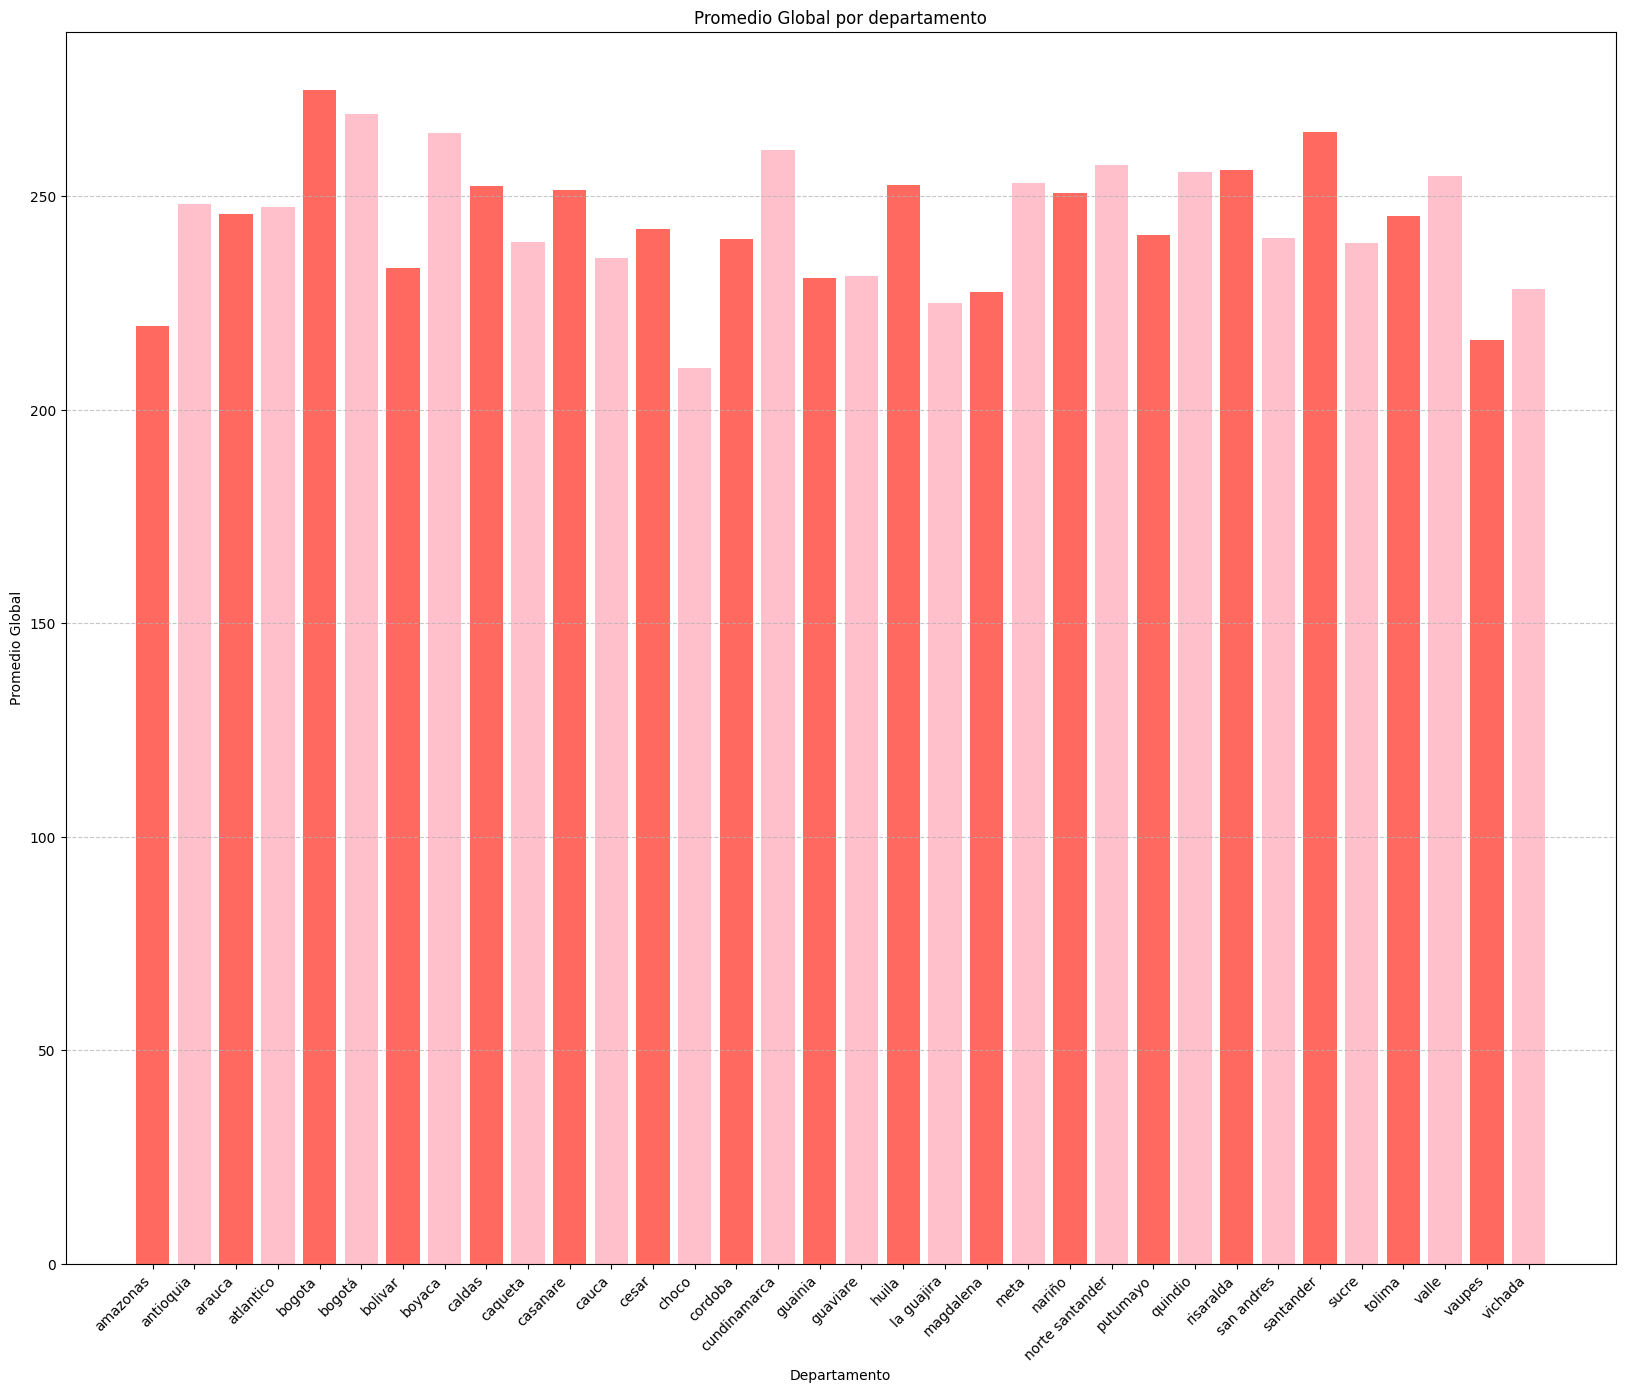

In [ ]:
df["punt_global"] = pd.to_numeric(df["punt_global"], errors="coerce")

# Calcular promedio por periodo
promedios_por_periodo = df.groupby("cole_depto_ubicacion")["punt_global"].mean()

# Crear tabla de promedios por periodo
tabla_promedios = df.groupby("cole_depto_ubicacion", as_index=False)["punt_global"].mean()
tabla_promedios.rename(columns={"punt_global": "promedio_global"}, inplace=True)

# Graficar
plt.figure(figsize=(20, 16))
plt.bar(tabla_promedios["cole_depto_ubicacion"], tabla_promedios["promedio_global"], color=['#ff695f', 'Pink'])

plt.xlabel("Departamento")  # Etiqueta para el eje X
plt.ylabel("Promedio Global")  # Etiqueta para el eje Y
plt.title("Promedio Global por departamento")  # Título de la gráfica

plt.xticks(tabla_promedios["cole_depto_ubicacion"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
(plt.xticks(rotation=45, ha="right"))

plt.show()

## Linea de tiempo de puntajes por periodo según departamento API datos.gov.co

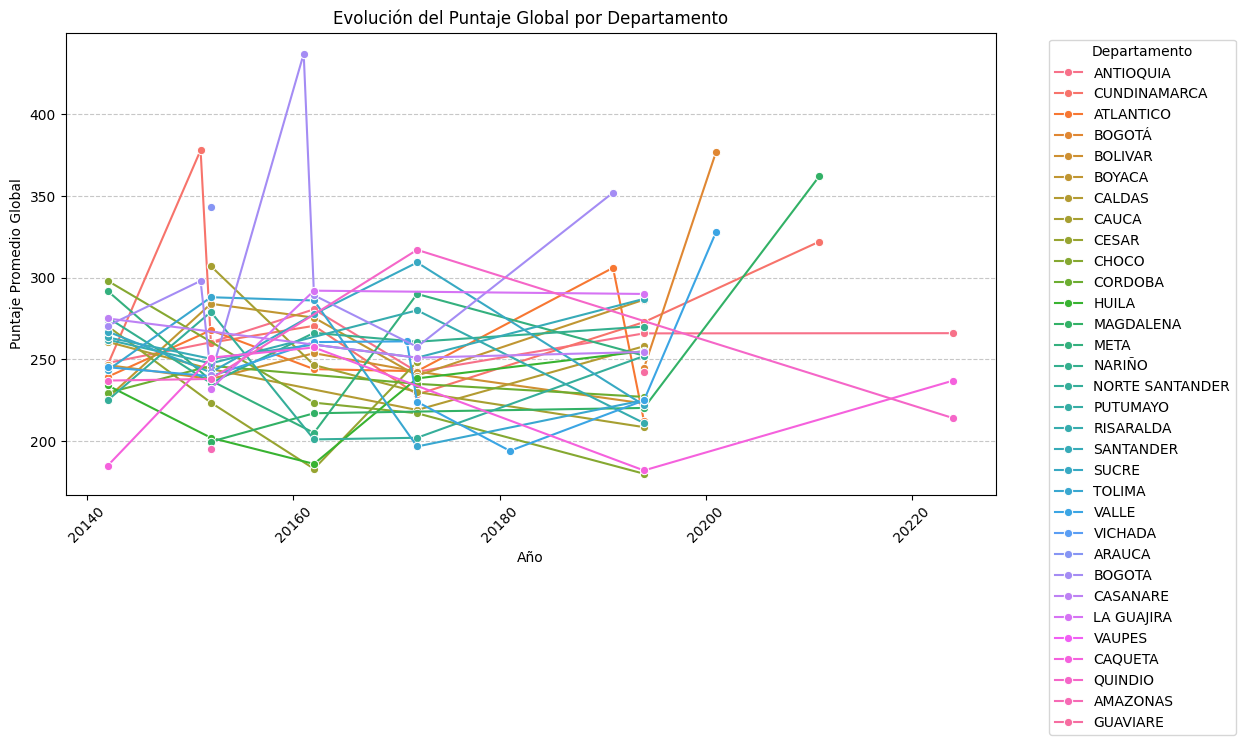

## Linea de tiempo de puntajes por periodo según departamento base de datos completa

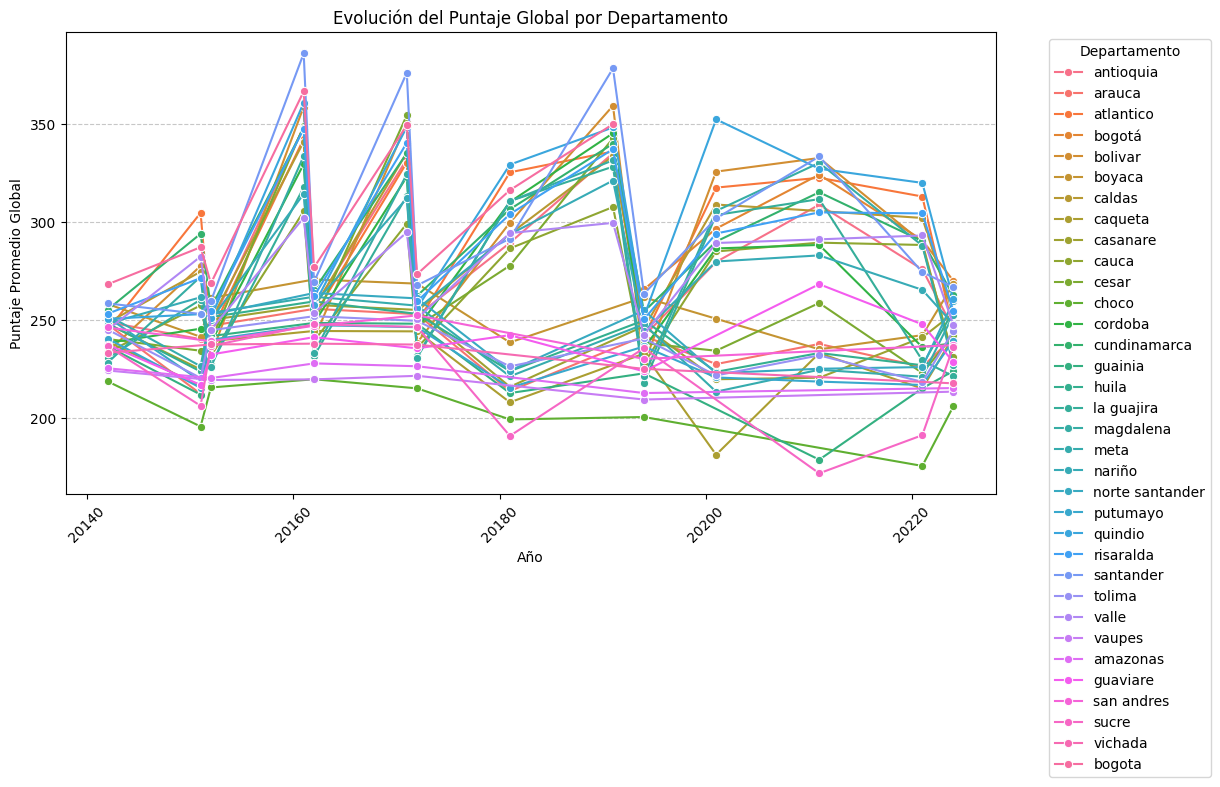

In [ ]:
# Calcular promedio por año y departamento
df_tiempo = df.groupby(["periodo", "cole_depto_ubicacion"], as_index=False)["punt_global"].mean()

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_tiempo, x="periodo", y="punt_global", hue="cole_depto_ubicacion", marker="o")

plt.xlabel("Año")
plt.ylabel("Puntaje Promedio Global")
plt.title("Evolución del Puntaje Global por Departamento")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.legend(title="Departamento", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()